In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [318]:
run = '5'
folder = 'filt'

file = f"../logs/ident/{folder}/{run}.log"

df = pd.read_csv(file, names=('tag', 'ts', 'v1', 'v2', 'v3', 'v4'))

df_s = df[df.tag == 'pos']
df_s = df_s.rename(columns={'v1' : 'x', 'v2' : 'y', 'v3' : 'z', 'v4' : 'a'})


df_u = df[df.tag == 'input']
df_u = df_u.rename(columns={'v1' : 'roll', 'v2' : 'pitch', 'v3' : 'yaw', 'v4' : 'throttle'})

dt = 0.02

assert(df_s.shape[0] == df_u.shape[0])



In [319]:

cvut_blue = (0/255, 101/255, 189/255)
cvut_orange = (224/255, 82/255, 6/255)
cvut_green = (162/255, 173/255, 0/255)

In [320]:
shift = 35

x, y, z, a = [df_s[v].to_numpy()[shift:] for v in ['x', 'y', 'z', 'a']]
roll, pitch, yaw, throttle = [df_u[v].to_numpy()[shift:] for v in ['roll', 'pitch', 'yaw', 'throttle']]
roll_sh, pitch_sh, yaw_sh, throttle_sh = [df_u[v].to_numpy()[:-shift] for v in ['roll', 'pitch', 'yaw', 'throttle']]





In [321]:
def fit_action(s, a):
	y_ = np.stack([np.cumsum(a), np.ones_like(a)], axis=1)
	b = np.linalg.inv(y_.T @ y_) @ y_.T @ s[:, None]

	return b[0]*np.cumsum(a) + b[1]

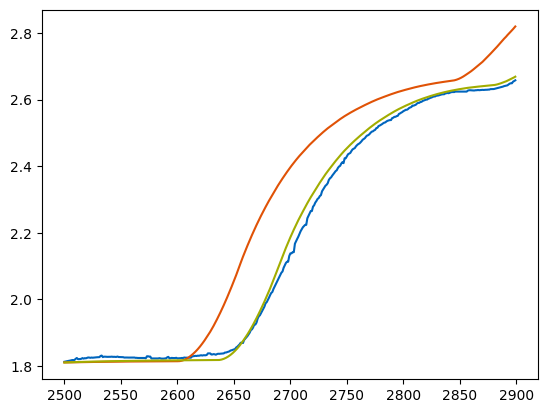

In [322]:
t0 = 2500
t1 = 2900


p_a = -0.0
dx = dt*(np.cos(a + p_a)*pitch + np.sin(a + p_a)*roll)
dx_sh = dt*(np.cos(a + p_a)*pitch_sh + np.sin(a + p_a)*roll_sh)

# ax = fit_action(x[t0:t1], dx[t0:t1])
# ax_sh = fit_action(x[t0:t1], dx_sh[t0:t1])


t = np.arange(t0, t1)

b = [0.95, 1.81]

plt.plot(t, x[t0:t1], c=cvut_blue)
plt.plot(t, b[0]*np.cumsum(dx[t0:t1]) + b[1], c=cvut_orange)
plt.plot(t, b[0]*np.cumsum(dx_sh[t0:t1]) + b[1], c=cvut_green)
plt.show()


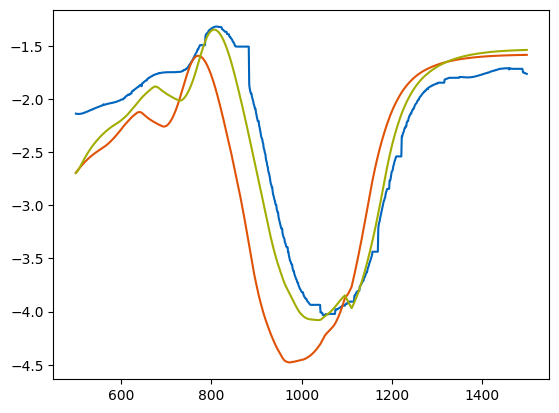

In [339]:
t0 = 500
t1 = 1500


dy = dt*(np.sin(a+ p_a)*pitch - np.cos(a + p_a)*roll)
dy_sh = dt*(np.sin(a+ p_a)*pitch_sh - np.cos(a + p_a)*roll_sh)

ay = fit_action(y[t0:t1], dy[t0:t1])
ay_sh = fit_action(y[t0:t1], dy_sh[t0:t1])

t = np.arange(t0, t1)

# plt.plot(t, y[t0:t1], c=cvut_blue)
# plt.plot(t, ay, c=cvut_orange)
# plt.plot(t, ay_sh, c=cvut_green)

b = [1.75, -2.7]

plt.plot(t, y[t0:t1], c=cvut_blue)
plt.plot(t, b[0]*np.cumsum(dy[t0:t1]) + b[1], c=cvut_orange)
plt.plot(t, b[0]*np.cumsum(dy_sh[t0:t1]) + b[1], c=cvut_green)
plt.show()
plt.show()



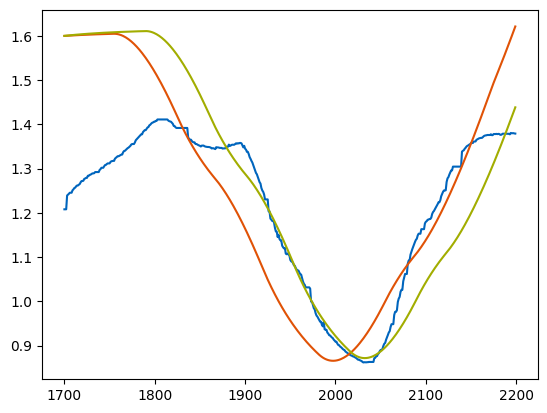

In [330]:
t0 = 1700
t1 = 2200


dz = dt*throttle
dz_sh = dt*throttle_sh

az = fit_action(z[t0:t1], dz[t0:t1])
az_sh = fit_action(z[t0:t1], dz_sh[t0:t1])

t = np.arange(t0, t1)

# plt.plot(t, z[t0:t1], c=cvut_blue)
# plt.plot(t, az, c=cvut_orange)
# plt.plot(t, az_sh, c=cvut_green)

b = [0.35, 1.6]

plt.plot(t, z[t0:t1], c=cvut_blue)
plt.plot(t, b[0]*np.cumsum(dz[t0:t1]) + b[1], c=cvut_orange)
plt.plot(t, b[0]*np.cumsum(dz_sh[t0:t1]) + b[1], c=cvut_green)
plt.show()


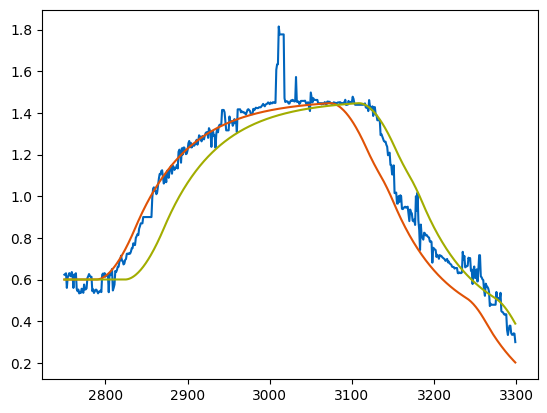

In [361]:
t0 = 2750
t1 = 3300

da = dt*yaw
da_sh = dt*yaw_sh

aa = fit_action(a[t0:t1], da[t0:t1])
aa_sh = fit_action(a[t0:t1], da_sh[t0:t1])

t = np.arange(t0, t1)

# plt.plot(t, a[t0:t1], c=cvut_blue)
# plt.plot(t, aa, c=cvut_orange)
# plt.plot(t, aa_sh, c=cvut_green)


b = [0.9, 0.6]

plt.plot(t, a[t0:t1], c=cvut_blue)
plt.plot(t, b[0]*np.cumsum(da[t0:t1]) + b[1], c=cvut_orange)
plt.plot(t, b[0]*np.cumsum(da_sh[t0:t1]) + b[1], c=cvut_green)
plt.show()
